In [1]:
import numpy as np
from  snf import compute
import glob
import os
import pandas as pd
from scipy.spatial.distance import euclidean
from scipy.stats import pearsonr
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def entropy(similarity_matrix):
    # Normalize the similarity matrix
    norm_matrix = similarity_matrix / similarity_matrix.sum()
    
    # Compute the entropy
    p = norm_matrix.flatten()
    entropy = -np.sum(p[p!=0] * np.log2(p[p!=0]))
    return entropy

In [3]:
def similarity_score(A, B):
    # Reshape matrices to have a shape of (n_samples, n_features)
    A = A.reshape(1, -1)
    B = B.reshape(1, -1)

    # Calculate cosine similarity
    cos_sim = cosine_similarity(A, B)[0][0]

    # Calculate Euclidean distance
    euclidean_dist = euclidean(A, B)

    # Calculate Pearson correlation coefficient
    pearson_corr_coef = pearsonr(A.flatten(), B.flatten())[0]

    return cos_sim, euclidean_dist, pearson_corr_coef

def calc_all_sim(sim_mat):
    mat_list1 = []
    mat_list2 = []
    mat_list3 = []
    for mat1 in sim_mat:
        mat1_list = []
        mat2_list = []
        mat3_list = []
        for mat2 in sim_mat:
            a,b,c = similarity_score(mat1,mat2)
            mat1_list.append(a)
            mat2_list.append(b)
            mat3_list.append(c)
        mat_list1.append(mat1_list)
        mat_list2.append(mat2_list)
        mat_list3.append(mat3_list)
    return np.array(mat_list1), np.array(mat_list2), np.array(mat_list3)

In [26]:
def plot_similarity(matrices, figsize):
    plt.figure(figsize=figsize)
    sns.heatmap(matrices[0], annot=True, cmap='vlag', fmt='.2f')
    plt.title('Cosine Similarity')
    plt.show()
    plt.figure(figsize=figsize)
    sns.heatmap(matrices[1], annot=True, cmap='vlag', fmt='.0f')
    plt.title('Eucledian dist')
    plt.show()
    plt.figure(figsize=figsize)
    sns.heatmap(matrices[2], annot=True, cmap='vlag', fmt='.2f')
    plt.title('Pearson correlation')
    plt.show() 

In [5]:
folder = "../data/SND/disease_disease_matrix/"
file_paths = glob.glob(os.path.join(folder, '*'))

In [6]:
file_paths

['../data/SND/disease_disease_matrix/diseaseSimGPGenes.csv',
 '../data/SND/disease_disease_matrix/diseaseSimBefreeGenes.csv',
 '../data/SND/disease_disease_matrix/diseaseSimLncRNA.csv',
 '../data/SND/disease_disease_matrix/diseaseSimResnik.csv',
 '../data/SND/disease_disease_matrix/diseaseSimCureatedGenes.csv',
 '../data/SND/disease_disease_matrix/diseaseSimMirRNA.csv',
 '../data/SND/disease_disease_matrix/diseaseSimBefreeVariants.csv',
 '../data/SND/disease_disease_matrix/diseaseSimGPHpo.csv',
 '../data/SND/disease_disease_matrix/diseaseSimWang.csv',
 '../data/SND/disease_disease_matrix/diseaseSimLin.csv',
 '../data/SND/disease_disease_matrix/diseaseSimPSB.csv',
 '../data/SND/disease_disease_matrix/diseaseSimDisGeNET.csv',
 '../data/SND/disease_disease_matrix/diseaseSimFun.csv',
 '../data/SND/disease_disease_matrix/diseaseSimCuratedVariants.csv']

In [7]:
sim_matrices = [] 
for i in file_paths:
    data = pd.read_csv(i, index_col=0)
    sim_matrices.append(data.values)

In [8]:
matrix_entropies = []
for i in sim_matrices:
    matrix_entropies.append(entropy(i))

In [9]:
matrix_entropies

[16.518453910472722,
 13.164952777819376,
 11.315281095275786,
 16.127524461204395,
 7.905171226753891,
 12.920055432231772,
 8.126967476364328,
 12.437789061655984,
 16.127524461204395,
 16.371453175055212,
 16.46592372988005,
 8.52151021020253,
 13.350057989895898,
 7.905171226753891]

In [10]:
pairwise_similarities = calc_all_sim(sim_matrices)

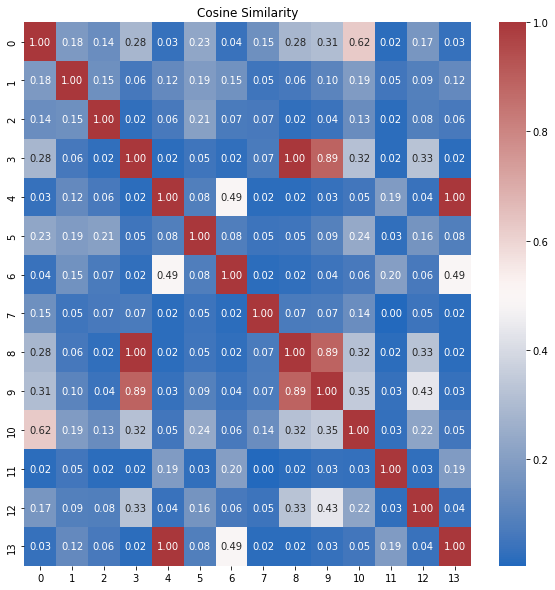

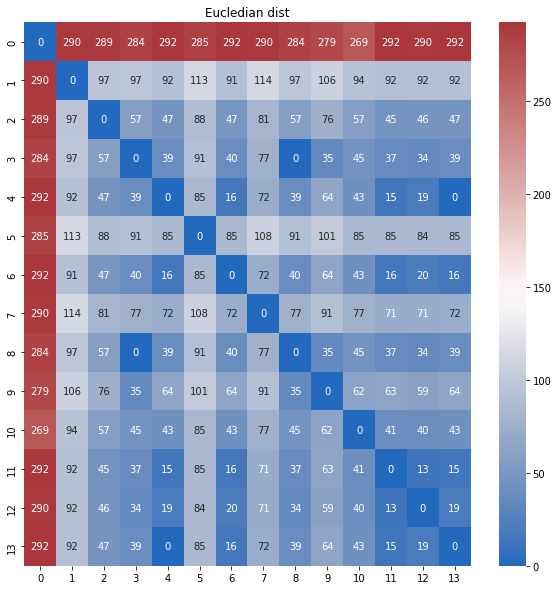

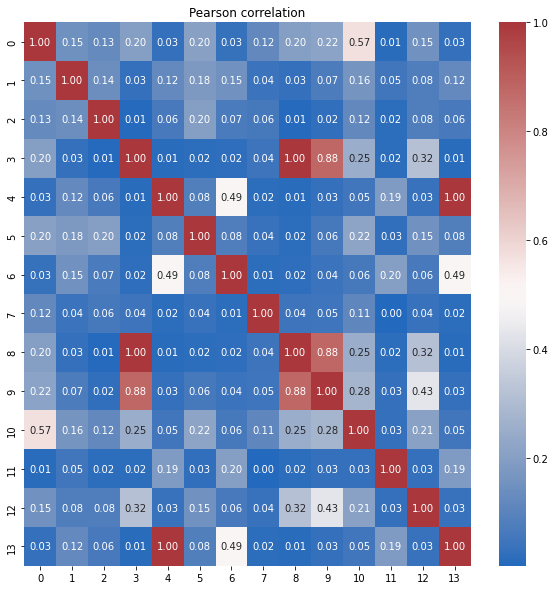

In [27]:
plot_similarity(pairwise_similarities,(10,10))

In [ ]:
prefix = "SND_disease"

In [28]:
similarity_thresh = 14
chosen_sim_matrix = []
for i in sim_matrices:
    if entropy(i) < similarity_thresh:
        chosen_sim_matrix.append(i)
        
snf_c = compute.snf(chosen_sim_matrix)
# np.save(prefix+"_snf"+str(similarity_thresh)+".npy", snf_c)
sim_chosen = pd.DataFrame(snf_c,index=data.index, columns=data.columns)
# sim_chosen.to_csv(folder + prefix+"_snf"+str(similarity_thresh)+".csv")
len(chosen_sim_matrix)

/home2/aswin/miniconda3/envs/pyg/lib/python3.9/site-packages/snf/compute.py:401: RuntimeWarning: invalid value encountered in divide
  mat = mat / np.nansum(mat, axis=1, keepdims=True)


9

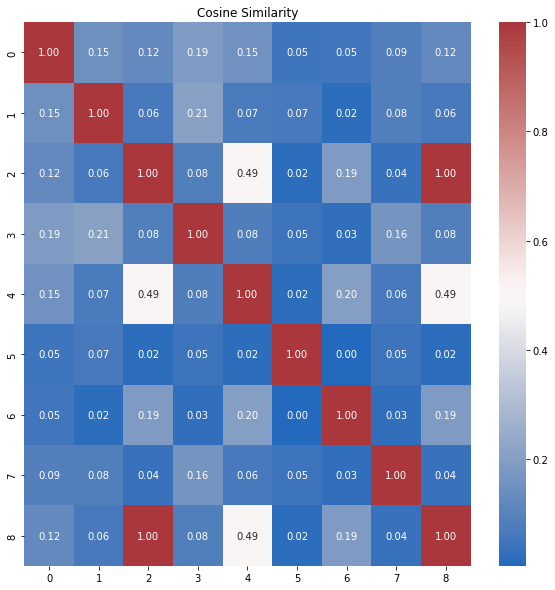

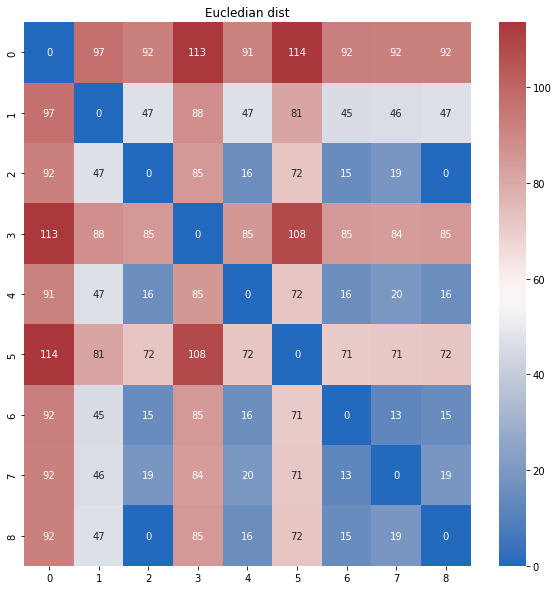

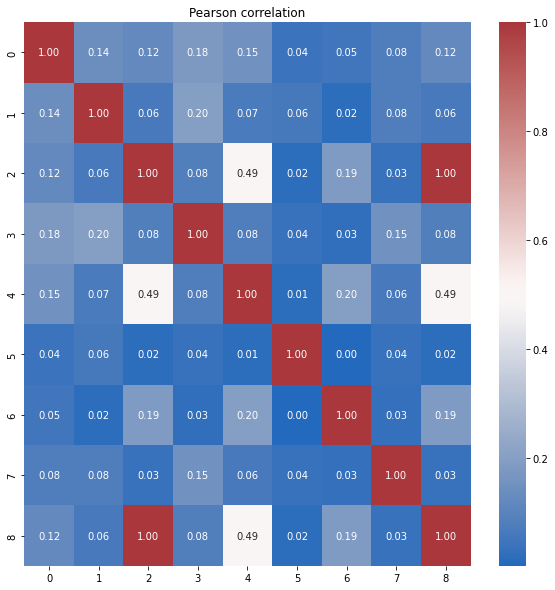

In [29]:
pairwise_similarities = calc_all_sim(chosen_sim_matrix)
plot_similarity(pairwise_similarities,(10,10))